In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Extraction and Merging

### Loading SDP data

In [48]:
df=pd.read_csv('/home/the_nice_guy/Codes/ECO/Kuznets/base_1999-00 - Sheet1.csv')
df1=pd.read_csv('/home/the_nice_guy/Codes/ECO/Kuznets/base_2004-05 - Sheet1.csv')
df2=pd.read_csv('/home/the_nice_guy/Codes/ECO/Kuznets/base_2011-12 - Sheet1.csv')

#### Fixing Telangana Entries

In [49]:
telangana_ratios=[]
telangana_ratios.extend(df1.iloc[:,1]/df1.iloc[:,-1])
final_ratio=np.mean(telangana_ratios)

df.iloc[:,-1]=df.iloc[:,1].divide(final_ratio).astype(int)

#### Merging Base 1999-00 and Base 2004-05

In [50]:
ratio = df1.iloc[1,1:]/df.iloc[-1,1:]
df.iloc[:,1:] = df.iloc[:,1:].multiply(ratio).astype(int)
df.drop(df.tail(1).index, inplace=True) 

df = pd.concat([df, df1], ignore_index=True)

#### Merging Base 2004-05 and Base 2011-12

In [51]:
ratio = df2.iloc[1,1:]/df.iloc[-1,1:]
df.iloc[:,1:] = df.iloc[:,1:].multiply(ratio).astype(int)
df.drop(df.tail(1).index, inplace=True)

df = pd.concat([df, df2], ignore_index=True)
print(df.shape)
print(df.info())

(20, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   YEAR                       20 non-null     object
 1   ANDHRA PRADESH             20 non-null     int64 
 2   ARUNACHAL PRADESH          20 non-null     int64 
 3   ASSAM                      20 non-null     int64 
 4   BIHAR                      20 non-null     int64 
 5   GOA                        20 non-null     int64 
 6   GUJARAT                    20 non-null     int64 
 7   HARYANA                    20 non-null     int64 
 8   HIMACHAL PRADESH           20 non-null     int64 
 9   JAMMU & KASHMIR            20 non-null     int64 
 10  JHARKHAND                  20 non-null     int64 
 11  KARNATAKA                  20 non-null     int64 
 12  KERALA                     20 non-null     int64 
 13  MADHYA PRADESH             20 non-null     int64 
 14  CHH

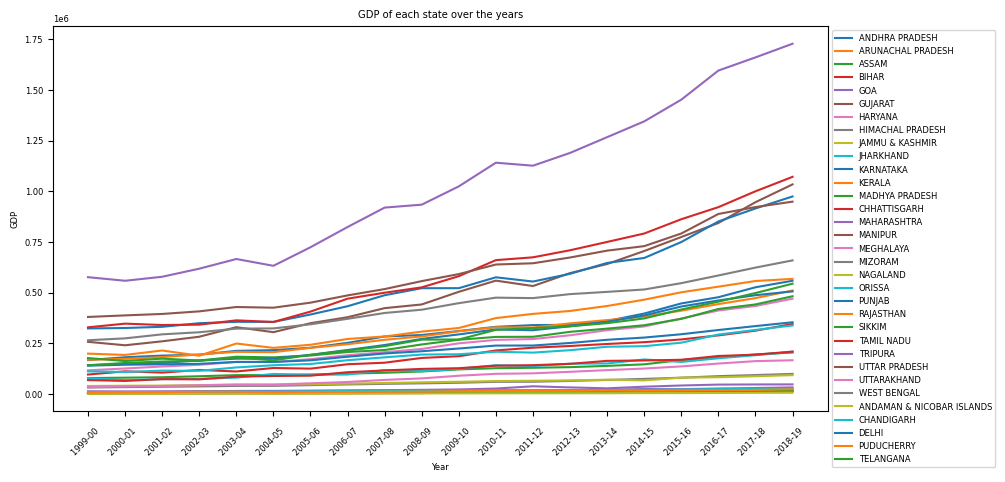

In [52]:
plt.figure(figsize=(10,5))
for i in range(1,df.shape[1]):
    plt.plot(df.columns[0],df.columns[i],data=df,label=df.columns[i])
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('GDP')
plt.title('GDP of each state over the years')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [53]:
df.iloc[:,0]=df.iloc[:,0].str.slice(0,4)
df['YEAR']=df['YEAR'].astype(int)

### Loading GWQ data

In [54]:
df3=pd.read_csv('/home/the_nice_guy/Codes/ECO/Kuznets/GWQ.csv')
features=['state','district','year','dyid','nitrate']
feat_drop=[col for col in df3.columns if col not in features]
df3.drop(columns=feat_drop, axis=1, inplace=True)
df3['district']=df3['district'].str.lower()
print(df3.info())
del df1,df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11708 entries, 0 to 11707
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     11708 non-null  object 
 1   district  11708 non-null  object 
 2   year      11708 non-null  int64  
 3   dyid      11708 non-null  object 
 4   nitrate   7096 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 457.5+ KB
None


In [55]:
df3.head()

,state,district,year,dyid,nitrate
0,West Bengal,24 paraganas north,2000,24 Paraganas North2000,7.375000
1,West Bengal,24 paraganas north,2001,24 Paraganas North2001,NaN
2,West Bengal,24 paraganas north,2002,24 Paraganas North2002,11.273889
3,West Bengal,24 paraganas north,2003,24 Paraganas North2003,NaN
4,West Bengal,24 paraganas north,2004,24 Paraganas North2004,6.185417


#### Analysing Distributions

In [56]:
unique_districts=df3.groupby('state')['district'].nunique()
unique_districts=pd.DataFrame(unique_districts)
unique_districts.reset_index(inplace=True)
unique_districts.columns=['state','districts']
print(unique_districts)

                                           state  districts
0                    Andaman And Nicobar Islands          2
1                                 Andhra Pradesh         13
2                              Arunachal Pradesh          6
3                                          Assam         26
4                                          Bihar         38
5                                     Chandigarh          1
6                                   Chhattisgarh         20
7                                          Delhi          9
8                                            Goa          2
9                                        Gujarat         26
10                                       Haryana         21
11                              Himachal Pradesh          8
12                             Jammu And Kashmir         14
13                                     Jharkhand         24
14                                     Karnataka         33
15                                      

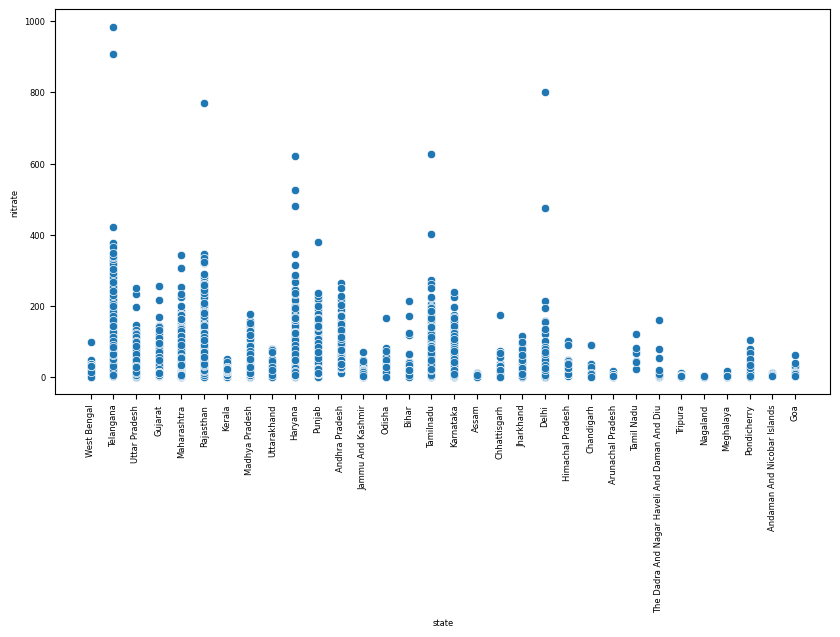

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='state',y='nitrate',data=df3)
plt.xticks(rotation=90)
plt.rc('font', size=6)
plt.show()

In [58]:
unique_districts_year=df3.groupby('year')['district'].nunique()
unique_districts_year=pd.DataFrame(unique_districts_year)
unique_districts_year.reset_index(inplace=True)
unique_districts_year.columns=['year','districts']
print(unique_districts_year)

    year  districts
0   2000        620
1   2001        620
2   2002        620
3   2003        620
4   2004        620
5   2005        620
6   2006        620
7   2007        620
8   2008        620
9   2009        620
10  2010        620
11  2011        611
12  2012        611
13  2013        611
14  2014        611
15  2015        611
16  2016        611
17  2017        611
18  2018        611


#### Analyzing Outliers and High Leverage Points

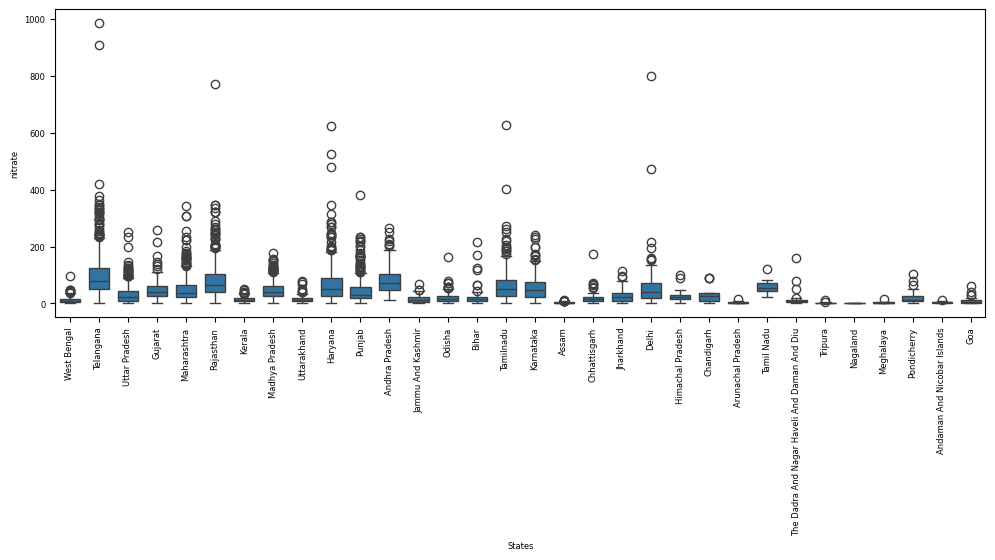

In [59]:
plt.figure(figsize=(12,4))
sns.boxplot(x='state',y='nitrate',data=df3,width=0.7)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.xticks(rotation=90)
plt.xlabel('States')
plt.show()

In [60]:
def find_outliers(df):
    q1 = df['nitrate'].quantile(0.25)
    q3 = df['nitrate'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    return df[(df['nitrate'] < lower_bound) | (df['nitrate'] > upper_bound)]

num_outliers = []
for state in df3['state'].unique():
    num_outliers.append([state,find_outliers(df3[df3['state']==state]).shape[0],find_outliers(df3[df3['state']==state]).shape[0]/df3[df3['state']==state].shape[0]])

num_outliers=pd.DataFrame(num_outliers,columns=['state','num_outliers','outlier_ratios'])
sorted_num_outliers=num_outliers.sort_values(by='num_outliers',ascending=False)
print(sorted_num_outliers)
print(sorted_num_outliers['num_outliers'].sum())

                                           state  num_outliers  outlier_ratios
1                                      Telangana            34        0.052632
10                                        Punjab            32        0.076555
5                                      Rajasthan            31        0.045994
4                                    Maharashtra            26        0.039216
9                                        Haryana            24        0.060150
7                                 Madhya Pradesh            22        0.022267
2                                  Uttar Pradesh            21        0.015295
15                                     Tamilnadu            14        0.022690
16                                     Karnataka            10        0.015974
6                                         Kerala             9        0.033835
13                                        Odisha             9        0.015280
17                                         Assam    

335
0.028612914246668945


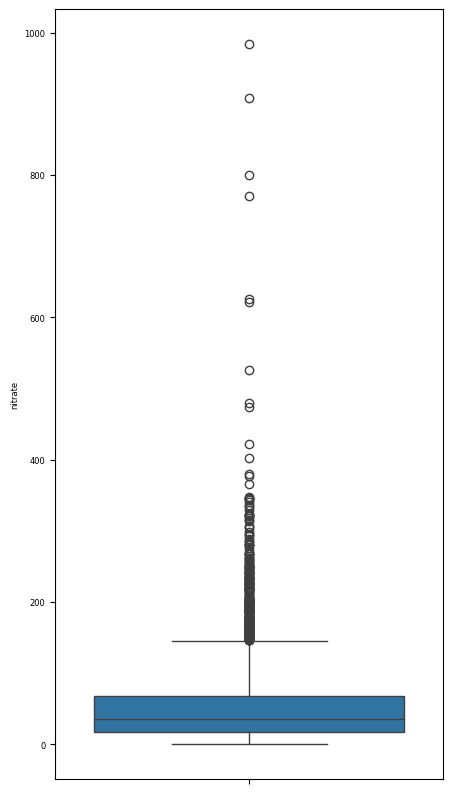

In [61]:
outliers=find_outliers(df3)
outliers_num=outliers.shape[0]
outliers_ratio=outliers_num/df3.shape[0]
print(outliers_num)
print(outliers_ratio)

plt.figure(figsize=(5,10))
sns.boxplot(y='nitrate',data=df3)
plt.show()


#### Analyzing Missing Data

In [62]:
total_data = df3.shape[0]
print(total_data)

missing_data = df3.isnull().sum()
print(missing_data)

11708
state          0
district       0
year           0
dyid           0
nitrate     4612
dtype: int64


In [63]:
missing_data_state =[]
for state in df3['state'].unique():
    missing_data_state.append([state,df3[df3['state']==state].isnull().sum().sum(),df3[df3['state']==state].isnull().sum().sum()/df3[df3['state']==state].shape[0]])
missing_data_state=pd.DataFrame(missing_data_state,columns=['state','missing_data','missing_data_ratio'])

sorted_missing_data_state=missing_data_state.sort_values(by='missing_data_ratio',ascending=False)
sorted_missing_data_state.reset_index(drop=True,inplace=True)
sorted_missing_data_state

,state,missing_data,missing_data_ratio
0,Nagaland,73,0.960526
1,Bihar,614,0.866008
2,Jharkhand,379,0.838496
3,Meghalaya,123,0.809211
4,Arunachal Pradesh,86,0.754386
5,Odisha,431,0.731749
6,Uttar Pradesh,1002,0.729789
7,Assam,349,0.706478
8,Tripura,48,0.631579
9,Andaman And Nicobar Islands,23,0.605263


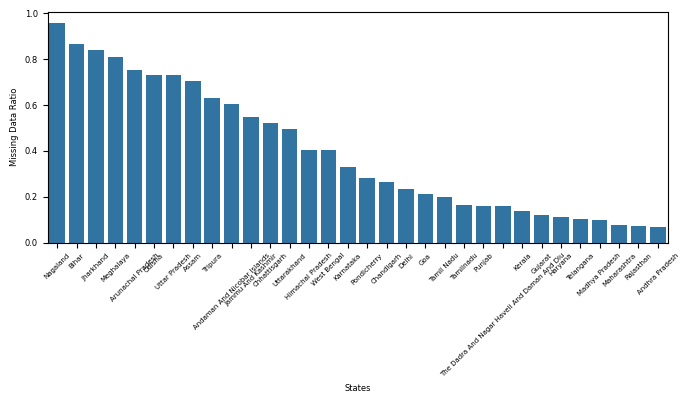

In [64]:
sorted_missing_data_state = missing_data_state.sort_values(by='missing_data_ratio',ascending=False)
plt.figure(figsize=(8,3))
sns.barplot(x='state',y='missing_data_ratio',data=sorted_missing_data_state)
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=5)
plt.xlabel('States')
plt.ylabel('Missing Data Ratio')
plt.show()

In [65]:
# for district in df3['district'].unique():
#     plt.figure(figsize=(8,4))
#     sns.barplot(x='year',y='nitrate',data=df3[df3['district']==district])
#     plt.xticks(rotation=45)
#     plt.xlabel('Year')
#     plt.ylabel('Nitrate Level')
#     plt.savefig('/home/the_nice_guy/Codes/ECO/district-wise-missing-value-barplots/'+district+'.png')

    year  missing_data  total_data
0   2000           211         620
1   2001           302         620
2   2002           197         620
3   2003           508         620
4   2004           179         620
5   2005           242         620
6   2006           272         620
7   2007           251         620
8   2008           314         620
9   2009           248         620
10  2010           248         620
11  2011           298         611
12  2012           215         611
13  2013           162         611
14  2014           233         611
15  2015           293         611
16  2016           100         611
17  2017           235         611
18  2018           104         611


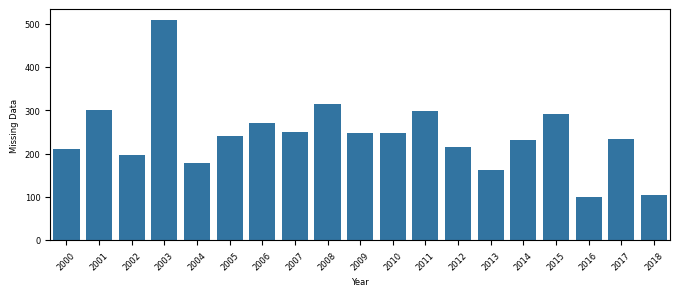

In [66]:
missing_data_year =[]
for year in df3['year'].unique():
    missing_data_year.append([year,df3[df3['year']==year].isnull().sum().sum(),df3[df3['year']==year].shape[0]])
missing_data_year=pd.DataFrame(missing_data_year,columns=['year','missing_data','total_data'])
print(missing_data_year)

plt.figure(figsize=(8,3))
sns.barplot(x='year',y='missing_data',data=missing_data_year)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Missing Data')
plt.show()

                   district  missing_data  total_data  missing_data_ratio
368                     mon            19          19            1.000000
305                  kohima            19          19            1.000000
613                   wokha            19          19            1.000000
334         lower subansiri            18          19            0.947368
163      east jaintia hills            18          19            0.947368
..                      ...           ...         ...                 ...
322  kumuram bheem asifabad             0          19            0.000000
493              sangareddy             0          19            0.000000
404                  nirmal             0          19            0.000000
434              peddapalli             0          19            0.000000
351              mancherial             0          19            0.000000

[620 rows x 4 columns]


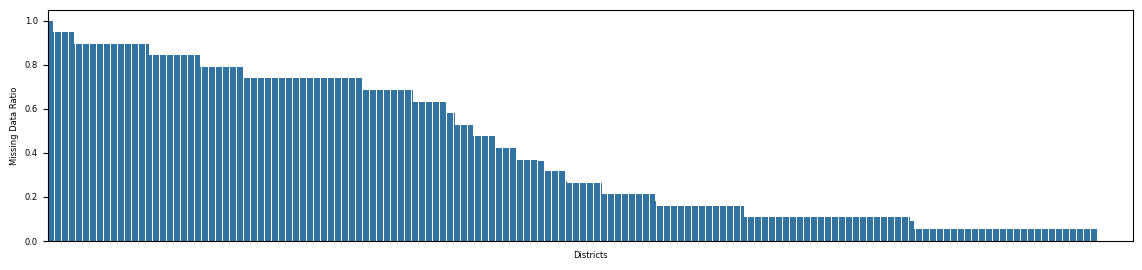

243.61722488038276
209


In [67]:
missing_data_district =[]
for district in df3['district'].unique():
    missing_data_district.append([district,df3[df3['district']==district].isnull().sum().sum(),df3[df3['district']==district].shape[0],df3[df3['district']==district].isnull().sum().sum()/df3[df3['district']==district].shape[0]])
missing_data_district=pd.DataFrame(missing_data_district,columns=['district','missing_data','total_data','missing_data_ratio'])
sorted_missing_data_district = missing_data_district.sort_values(by='missing_data_ratio',ascending=False)
print(sorted_missing_data_district)

plt.figure(figsize=(14,3))
sns.barplot(x='district',y='missing_data_ratio',data=sorted_missing_data_district)
plt.xticks([])
plt.xlabel('Districts')
plt.ylabel('Missing Data Ratio')
plt.show()

print(sorted_missing_data_district['missing_data_ratio'].sum())
print(sorted_missing_data_district[sorted_missing_data_district['missing_data_ratio']>0.66].shape[0])

#### Dropping Dadra and Nagar Haveli

In [68]:
df3.drop(df3[df3['state']=='The Dadra And Nagar Haveli And Daman And Diu'].index,inplace=True)
print(df3['state'].unique())

['West Bengal' 'Telangana' 'Uttar Pradesh' 'Gujarat' 'Maharashtra'
 'Rajasthan' 'Kerala' 'Madhya Pradesh' 'Uttarakhand' 'Haryana' 'Punjab'
 'Andhra Pradesh' 'Jammu And Kashmir' 'Odisha' 'Bihar' 'Tamilnadu'
 'Karnataka' 'Assam' 'Chhattisgarh' 'Jharkhand' 'Delhi' 'Himachal Pradesh'
 'Chandigarh' 'Arunachal Pradesh' 'Tamil Nadu' 'Tripura' 'Nagaland'
 'Meghalaya' 'Pondicherry' 'Andaman And Nicobar Islands' 'Goa']


### Loading Gini Indexes

In [69]:
gini=pd.read_csv('/home/the_nice_guy/Codes/ECO/Kuznets/districts_gini.csv')
gini['gini']=gini['gini'].astype(float)
print(gini.info())
import json
with open('/home/the_nice_guy/Codes/ECO/Kuznets/district_mapping.json') as f:
    district_mapping=json.load(f)
    for state in district_mapping.keys():
        for district in district_mapping[state].keys():
            if type(district_mapping[state][district])==list:
                for alias in district_mapping[state][district]:
                    entry=pd.DataFrame([[state,alias,gini[gini['district']==district]['gini'].values[0]]],columns=['state','district','gini'])
                    gini=pd.concat([gini,entry],ignore_index=True)
        
            elif type(district_mapping[state][district])==str:
                try:
                    # gini=gini._append({'state':state,'district':district_mapping[state][district],'gini':gini[gini['district']==district]['gini'].values[0]},ignore_index=True)
                    entry=pd.DataFrame([[state,district_mapping[state][district],gini[gini['district']==district]['gini'].values[0]]],columns=['state','district','gini'])
                    gini=pd.concat([gini,entry],ignore_index=True)
                except:
                    print('Error:',state,district)

print(gini[gini['gini'].isnull()])
print(gini[gini['gini']==0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     640 non-null    object 
 1   district  640 non-null    object 
 2   gini      623 non-null    float64
dtypes: float64(1), object(2)
memory usage: 15.1+ KB
None
                 state             district  gini
146            Gujarat                 Tapi   NaN
167            Haryana               Palwal   NaN
194  Jammu and Kashmir                Samba   NaN
195  Jammu and Kashmir                Reasi   NaN
196  Jammu and Kashmir               Ramban   NaN
197  Jammu and Kashmir             Kishtwar   NaN
198  Jammu and Kashmir               Kulgam   NaN
199  Jammu and Kashmir              Shopian   NaN
200  Jammu and Kashmir            Ganderbal   NaN
201  Jammu and Kashmir            Bandipora   NaN
224          Jharkhand              Simdega   NaN
225          Jharkhand  Saraikela Kharsawan

### Dropping and Synthesis of data

##### Drop the data

In [70]:
dataset1 = df3.copy(deep=False)
dataset1.dropna(inplace=True)
print(dataset1.info())
print(dataset1.isnull().sum())
print(dataset1.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 7048 entries, 0 to 11707
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     7048 non-null   object 
 1   district  7048 non-null   object 
 2   year      7048 non-null   int64  
 3   dyid      7048 non-null   object 
 4   nitrate   7048 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 330.4+ KB
None
state       0
district    0
year        0
dyid        0
nitrate     0
dtype: int64
(7048, 5)


In [71]:
dataset2 = df3.copy(deep=False)
states_to_drop = sorted_missing_data_state[sorted_missing_data_state['missing_data_ratio']>0.66]['state'].values
print(states_to_drop)
dataset2 = dataset2[~dataset2['state'].isin(states_to_drop)]
print(dataset2.shape)
print(dataset2.isnull().sum())

['Nagaland' 'Bihar' 'Jharkhand' 'Meghalaya' 'Arunachal Pradesh' 'Odisha'
 'Uttar Pradesh' 'Assam']
(7692, 5)
state          0
district       0
year           0
dyid           0
nitrate     1546
dtype: int64


In [72]:
dataset3 = df3.copy(deep=False)
districts_to_drop = sorted_missing_data_district[sorted_missing_data_district['missing_data_ratio']>0.66]['district'].values
print(districts_to_drop)
dataset3 = dataset3[~dataset3['district'].isin(districts_to_drop)]
print(dataset3.shape)
print(dataset3.isnull().sum())

['mon' 'kohima' 'wokha' 'lower subansiri' 'east jaintia hills' 'ballari'
 'ramgarh' 'sheohar' 'kulgam' 'uttar kashi' 'viluppuram' 'shravasti'
 'chamba' 'hanumakonda' 'samastipur' 'sheikhpura' 'gaya' 'dumka' 'garhwa'
 'siwan' 'sitamarhi' 'deoghar' 'godda' 'south garo hills' 'chirang'
 'buxar' 'supaul' 'bokaro' 'bhojpur' 'giridih' 'hazaribagh' 'gopalganj'
 'saharsa' 'muzaffarnagar' 'nalanda' 'narayanpur' 'nawada' 'madhepura'
 'latehar' 'lakhisarai' 'kokrajhar' 'koderma' 'khagaria' 'patna'
 'pilibhit' 'jehanabad' 'jamui' 'reasiãƒâ€šã‚â\xa0' 'rohtas' 'begusarai'
 'bhagalpur' 'munger' 'arwal' 'vaishali' 'banka' 'warangal'
 'west khasi hills' 'vijayapura' 'shamli' 'shahjahanpur' 'bahraich'
 'siddharth nagar' 'dimapur' 'lohardaga' 'simdega' 'firozpur' 'darbhanga'
 'balrampur' 'madhubani' 'chatra' 'almora' 'gonda' 'saran' 'gumla'
 'sambhal' 'sahebganj' 'hailakandi' 'araria' 'rampur' 'pakur' 'palamu'
 'purnia' 'purbi champaran' 'kaushambi' 'nalbari' 'pashchim champaran'
 'muzaffarpur' 'saraikel

##### Mean Substitution

In [73]:
dataset4 = dataset2.copy(deep=False)
print(dataset4.isnull().sum())
for state in dataset4['state'].unique():
    dataset4.loc[dataset4['state']==state,'nitrate'] = dataset4.loc[dataset4['state']==state,'nitrate'].fillna(dataset4[dataset4['state']==state]['nitrate'].mean())
dataset2=dataset4.copy(deep=False)
print(dataset2.isnull().sum())

state          0
district       0
year           0
dyid           0
nitrate     1546
dtype: int64
state       0
district    0
year        0
dyid        0
nitrate     0
dtype: int64


In [74]:
dataset5 = dataset3.copy(deep=False)
print(dataset5.isnull().sum())
for district in dataset5['district'].unique():
    dataset5.loc[dataset5['district']==district,'nitrate'] = dataset5.loc[dataset5['district']==district,'nitrate'].fillna(dataset5[dataset5['district']==district]['nitrate'].mean())
dataset3=dataset5.copy(deep=False)
print(dataset3.isnull().sum())

state          0
district       0
year           0
dyid           0
nitrate     1431
dtype: int64


state       0
district    0
year        0
dyid        0
nitrate     0
dtype: int64


In [75]:
del dataset4,dataset5

## Data Preprocessing

### Replace the State Names with their Abbreviations

In [76]:
abbreviations=pd.read_csv('/home/the_nice_guy/Codes/ECO/Kuznets/state_abbreviations.csv')

for i in range(abbreviations.shape[0]):
    dataset1['state'].replace(abbreviations.iloc[i,0],abbreviations.iloc[i,1],inplace=True)
    dataset2['state'].replace(abbreviations.iloc[i,0],abbreviations.iloc[i,1],inplace=True)
    dataset3['state'].replace(abbreviations.iloc[i,0],abbreviations.iloc[i,1],inplace=True)

dataset1['state'].replace('Tamilnadu','TN',inplace=True)
dataset2['state'].replace('Tamilnadu','TN',inplace=True)
dataset3['state'].replace('Tamilnadu','TN',inplace=True)

dataset1['state'].replace('The Dadra And Nagar Haveli And Daman And Diu','DN',inplace=True)
dataset2['state'].replace('The Dadra And Nagar Haveli And Daman And Diu','DN',inplace=True)
dataset3['state'].replace('The Dadra And Nagar Haveli And Daman And Diu','DN',inplace=True)

dataset1['state'].replace('Pondicherry','PY',inplace=True)
dataset2['state'].replace('Pondicherry','PY',inplace=True)
dataset3['state'].replace('Pondicherry','PY',inplace=True)

dataset1['state'].replace('Andaman And Nicobar Islands','AN',inplace=True)
dataset2['state'].replace('Andaman And Nicobar Islands','AN',inplace=True)
dataset3['state'].replace('Andaman And Nicobar Islands','AN',inplace=True)

dataset1['state'].replace('Jammu And Kashmir','JK',inplace=True)
dataset2['state'].replace('Jammu And Kashmir','JK',inplace=True)
dataset3['state'].replace('Jammu And Kashmir','JK',inplace=True)

print(dataset1['state'].unique())

['WB' 'TG' 'UP' 'GJ' 'MH' 'RJ' 'KL' 'MP' 'UK' 'HR' 'PB' 'AP' 'JK' 'OD'
 'BR' 'TN' 'KA' 'AS' 'CG' 'JH' 'DL' 'HP' 'CH' 'AR' 'TR' 'NL' 'ML' 'PY'
 'AN' 'GA']


/tmp/ipykernel_9716/3944666380.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset1['state'].replace(abbreviations.iloc[i,0],abbreviations.iloc[i,1],inplace=True)
/tmp/ipykernel_9716/3944666380.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [77]:
df.rename(columns={'YEAR':'year'},inplace=True)
df.rename(columns={'ANDHRA PRADESH':'AP'},inplace=True)
df.rename(columns={'ARUNACHAL PRADESH':'AR'},inplace=True)
df.rename(columns={'ASSAM':'AS'},inplace=True)
df.rename(columns={'BIHAR':'BR'},inplace=True)
df.rename(columns={'CHHATTISGARH':'CG'},inplace=True)
df.rename(columns={'GOA':'GA'},inplace=True)
df.rename(columns={'GUJARAT':'GJ'},inplace=True)
df.rename(columns={'HARYANA':'HR'},inplace=True)
df.rename(columns={'HIMACHAL PRADESH':'HP'},inplace=True)
df.rename(columns={'JHARKHAND':'JH'},inplace=True)
df.rename(columns={'KARNATAKA':'KA'},inplace=True)
df.rename(columns={'KERALA':'KL'},inplace=True)
df.rename(columns={'MADHYA PRADESH':'MP'},inplace=True)
df.rename(columns={'MAHARASHTRA':'MH'},inplace=True)
df.rename(columns={'MANIPUR':'MN'},inplace=True)
df.rename(columns={'MEGHALAYA':'ML'},inplace=True)
df.rename(columns={'MIZORAM':'MZ'},inplace=True)
df.rename(columns={'NAGALAND':'NL'},inplace=True)
df.rename(columns={'ODISHA':'OD'},inplace=True)
df.rename(columns={'PUNJAB':'PB'},inplace=True)
df.rename(columns={'RAJASTHAN':'RJ'},inplace=True)
df.rename(columns={'SIKKIM':'SK'},inplace=True)
df.rename(columns={'TAMIL NADU':'TN'},inplace=True)
df.rename(columns={'TELANGANA':'TG'},inplace=True)
df.rename(columns={'TRIPURA':'TR'},inplace=True)
df.rename(columns={'UTTAR PRADESH':'UP'},inplace=True)
df.rename(columns={'UTTARAKHAND':'UK'},inplace=True)
df.rename(columns={'WEST BENGAL':'WB'},inplace=True)
df.rename(columns={'ANDAMAN & NICOBAR ISLANDS':'AN'},inplace=True)
df.rename(columns={'CHANDIGARH':'CH'},inplace=True)
df.rename(columns={'DADRA AND NAGAR HAVELI AND DAMAN AND DIU':'DN'},inplace=True)
df.rename(columns={'DELHI':'DL'},inplace=True)
df.rename(columns={'LAKSHADWEEP':'LK'},inplace=True)
df.rename(columns={'PUDUCHERRY':'PY'},inplace=True)
df.rename(columns={'JAMMU & KASHMIR':'JK'},inplace=True)
df.rename(columns={'ANDAMAN AND NICOBAR ISLANDS':'AN'},inplace=True)
df.rename(columns={'ORISSA':'OD'},inplace=True)

print(df.columns[1:])


Index(['AP', 'AR', 'AS', 'BR', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL',
       'MP', 'CG', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OD', 'PB', 'RJ', 'SK', 'TN',
       'TR', 'UP', 'UK', 'WB', 'AN', 'CH', 'DL', 'PY', 'TG'],
      dtype='object')


### Merging GWQ with SDP data

In [78]:
dataset1['sdp'] = 0

for i in range(dataset1.shape[0]):
    state = dataset1.iloc[i,0]
    year = dataset1.iloc[i,2]
    dataset1.iloc[i,-1] = df[df['year']==year][state].values[0]

print(dataset1.head())

  state            district  year                    dyid    nitrate     sdp
0    WB  24 paraganas north  2000  24 Paraganas North2000   7.375000  274556
2    WB  24 paraganas north  2002  24 Paraganas North2002  11.273889  304701
4    WB  24 paraganas north  2004  24 Paraganas North2004   6.185417  323618
5    WB  24 paraganas north  2005  24 Paraganas North2005  18.000000  343994
7    WB  24 paraganas north  2007  24 Paraganas North2007   6.191500  399859


In [79]:
dataset2['sdp'] = 0

for i in range(dataset2.shape[0]):
    state = dataset2.iloc[i,0]
    year = dataset2.iloc[i,2]
    dataset2.iloc[i,-1] = df[df['year']==year][state].values[0]

print(dataset2.head())

  state            district  year                    dyid    nitrate     sdp
0    WB  24 paraganas north  2000  24 Paraganas North2000   7.375000  274556
1    WB  24 paraganas north  2001  24 Paraganas North2001  11.867399  294382
2    WB  24 paraganas north  2002  24 Paraganas North2002  11.273889  304701
3    WB  24 paraganas north  2003  24 Paraganas North2003  11.867399  322604
4    WB  24 paraganas north  2004  24 Paraganas North2004   6.185417  323618


In [80]:
dataset3['sdp'] = 0

for i in range(dataset3.shape[0]):
    state = dataset3.iloc[i,0]
    year = dataset3.iloc[i,2]
    dataset3.iloc[i,-1] = df[df['year']==year][state].values[0]

print(dataset3.head())

  state            district  year                    dyid    nitrate     sdp
0    WB  24 paraganas north  2000  24 Paraganas North2000   7.375000  274556
1    WB  24 paraganas north  2001  24 Paraganas North2001  10.147028  294382
2    WB  24 paraganas north  2002  24 Paraganas North2002  11.273889  304701
3    WB  24 paraganas north  2003  24 Paraganas North2003  10.147028  322604
4    WB  24 paraganas north  2004  24 Paraganas North2004   6.185417  323618


#### Adding Outlier Dummy Variables

In [81]:
dataset1['outlier']=0
dataset2['outlier']=0
dataset3['outlier']=0

for index in dataset1.index:
    if index in outliers.index:
        dataset1.loc[index,'outlier']=1
    else:
        dataset1.loc[index,'outlier']=0

for index in dataset2.index:
    if index in outliers.index:
        dataset2.loc[index,'outlier']=1
    else:
        dataset2.loc[index,'outlier']=0

for index in dataset3.index:
    if index in outliers.index:
        dataset3.loc[index,'outlier']=1
    else:
        dataset3.loc[index,'outlier']=0

### Merging Gini Indexes with SDP data

In [82]:
dataset1['gini']=np.nan
for index in dataset1.index:
    district = dataset1.loc[index,'district']
    for i in range(gini.shape[0]):
        if gini.iloc[i,1].lower()==district.lower():
            dataset1.loc[index,'gini']=gini.iloc[i,2]
            break

# drop all the rows with missing gini values
dataset1.dropna(inplace=True)
print(dataset1.isnull().sum())
print(dataset1.shape)


state       0
district    0
year        0
dyid        0
nitrate     0
sdp         0
outlier     0
gini        0
dtype: int64
(6761, 8)


In [83]:
dataset2['gini']=np.nan
for index in dataset2.index:
    district = dataset2.loc[index,'district']
    for i in range(gini.shape[0]):
        if gini.iloc[i,1].lower()==district.lower():
            dataset2.loc[index,'gini']=gini.iloc[i,2]
            break

dataset2.dropna(inplace=True)
print(dataset2.isnull().sum())
print(dataset2.shape)

state       0
district    0
year        0
dyid        0
nitrate     0
sdp         0
outlier     0
gini        0
dtype: int64
(7349, 8)


In [84]:
dataset3['gini']=np.nan
for index in dataset3.index:
    district = dataset3.loc[index,'district']
    for i in range(gini.shape[0]):
        if gini.iloc[i,1].lower()==district.lower():
            dataset3.loc[index,'gini']=gini.iloc[i,2]
            break

dataset3.dropna(inplace=True)
print(dataset3.isnull().sum())
print(dataset3.shape)

state       0
district    0
year        0
dyid        0
nitrate     0
sdp         0
outlier     0
gini        0
dtype: int64
(7346, 8)


In [85]:
dataset1.to_csv('/home/the_nice_guy/Codes/ECO/Kuznets/dataset1.csv',index=True)
dataset2.to_csv('/home/the_nice_guy/Codes/ECO/Kuznets/dataset2.csv',index=True)
dataset3.to_csv('/home/the_nice_guy/Codes/ECO/Kuznets/dataset3.csv',index=True)

outliers.to_csv('/home/the_nice_guy/Codes/ECO/Kuznets/outliers.csv',index=True)